In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_9.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

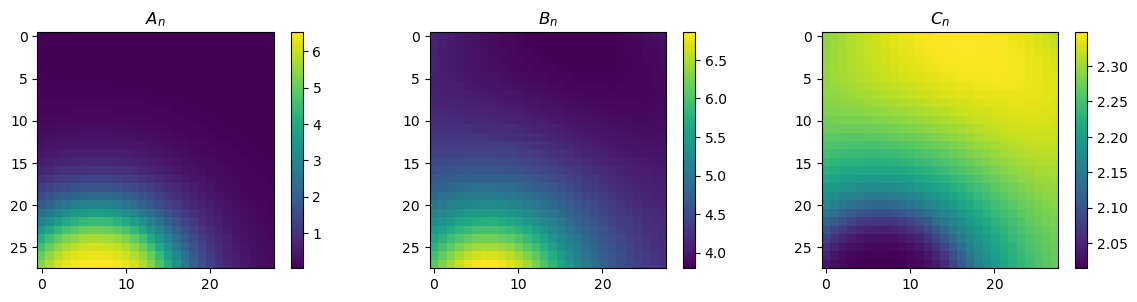

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(50,-50, 1)
y_slice = slice(50,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:8.675699, 
data A loss:2.000634, data B loss:4.374774, data C loss:2.300290, 
Laplacian A loss:10.576957, Laplacian B loss:2.498810
Physics loss:1.882490
Negative loss:0.134072

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=1.0000, V_B=1.0000, V_C=0.9999, mu_A=0.9000, mu_B=1.0999, K_AA=13.1191, K_AB=13.1191, K_AC=13.1191, K_BA=13.0339, K_BC=13.0339, K_CB=4.2393, K_CC=4.2394


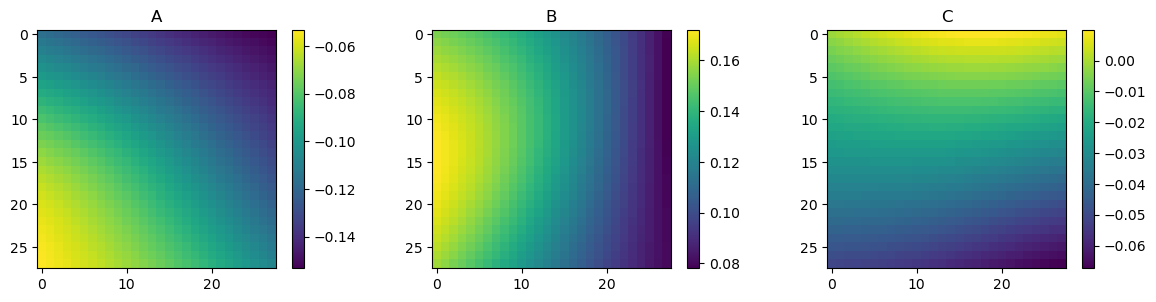

Epoch: 10000 
 data loss:0.015404, 
data A loss:0.004959, data B loss:0.004062, data C loss:0.006383, 
Laplacian A loss:0.036218, Laplacian B loss:0.028391
Physics loss:0.026290
Negative loss:0.000000

 b_A=0.0001, b_B=0.9115, b_C=6.9421, V_A=3.5494, V_B=75.9116, V_C=12.2820, mu_A=0.0968, mu_B=0.4805, K_AA=4.8113, K_AB=9.2299, K_AC=21.7254, K_BA=5.5334, K_BC=24.3723, K_CB=9.0136, K_CC=2.6253


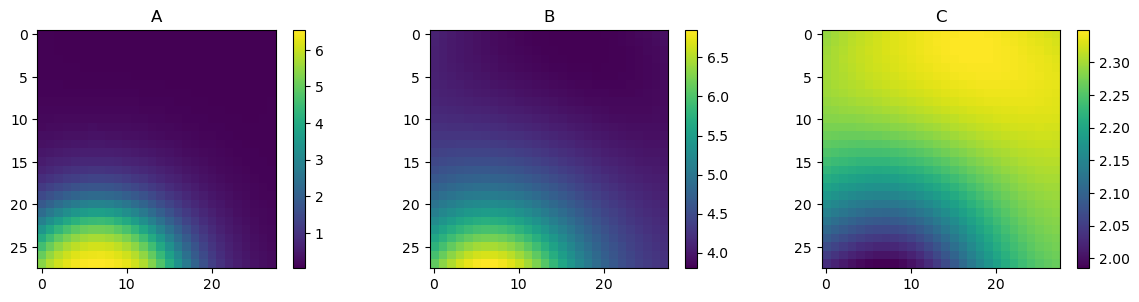

Epoch: 20000 
 data loss:0.011165, 
data A loss:0.002751, data B loss:0.002232, data C loss:0.006182, 
Laplacian A loss:0.011996, Laplacian B loss:0.015443
Physics loss:0.040750
Negative loss:0.000000

 b_A=-0.0055, b_B=0.9326, b_C=7.2109, V_A=3.6848, V_B=78.0046, V_C=13.1098, mu_A=0.0997, mu_B=0.4842, K_AA=4.8374, K_AB=9.3016, K_AC=18.6464, K_BA=5.4621, K_BC=19.8879, K_CB=9.0141, K_CC=2.7626


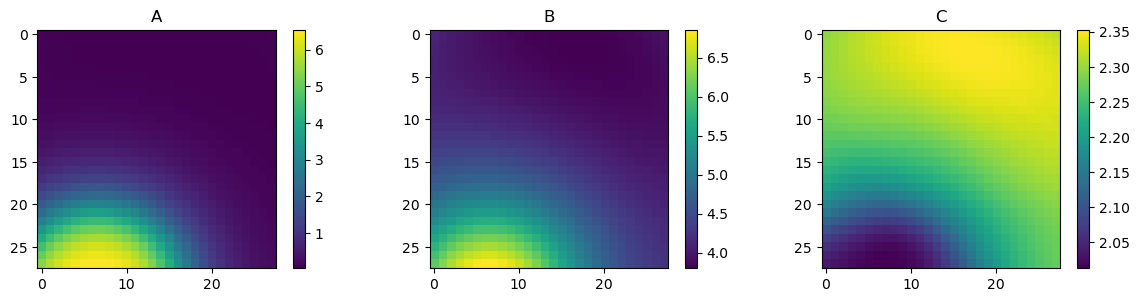

Epoch: 30000 
 data loss:0.010986, 
data A loss:0.002477, data B loss:0.004931, data C loss:0.003578, 
Laplacian A loss:0.009482, Laplacian B loss:0.012888
Physics loss:0.043381
Negative loss:0.000000

 b_A=-0.0080, b_B=0.9298, b_C=7.4325, V_A=3.6927, V_B=78.2017, V_C=13.6740, mu_A=0.0961, mu_B=0.4873, K_AA=4.8395, K_AB=9.3108, K_AC=19.3038, K_BA=5.4659, K_BC=15.5785, K_CB=9.0129, K_CC=2.8566


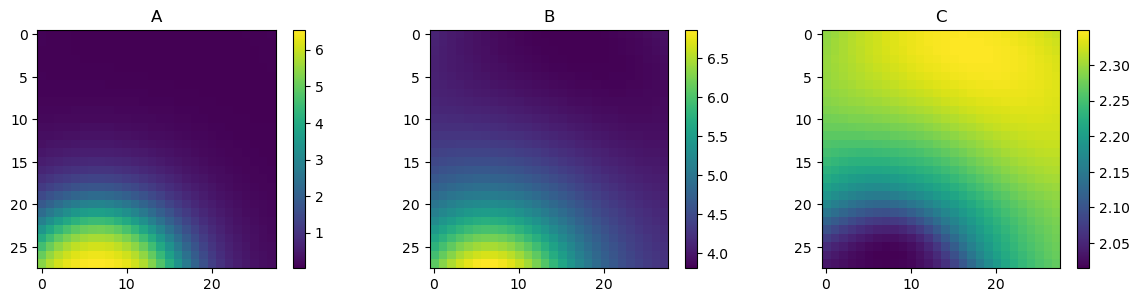

Epoch: 40000 
 data loss:0.008019, 
data A loss:0.004189, data B loss:0.002508, data C loss:0.001322, 
Laplacian A loss:0.026062, Laplacian B loss:0.010811
Physics loss:0.025976
Negative loss:0.000000

 b_A=-0.0027, b_B=0.9333, b_C=7.6227, V_A=3.6687, V_B=78.4376, V_C=14.1620, mu_A=0.0989, mu_B=0.4828, K_AA=4.8333, K_AB=9.3151, K_AC=21.0763, K_BA=5.4694, K_BC=13.5519, K_CB=9.0145, K_CC=2.9317


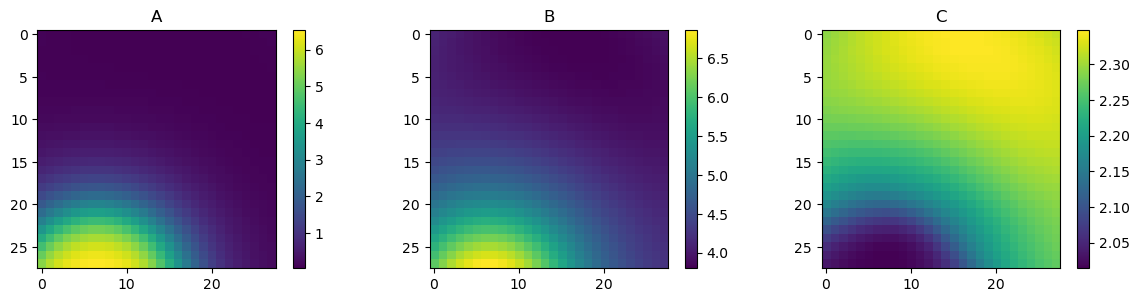

Epoch: 50000 
 data loss:0.004506, 
data A loss:0.002294, data B loss:0.001387, data C loss:0.000824, 
Laplacian A loss:0.005859, Laplacian B loss:0.009131
Physics loss:0.014288
Negative loss:0.000000

 b_A=0.0011, b_B=0.9367, b_C=7.7144, V_A=3.6661, V_B=78.6842, V_C=14.5894, mu_A=0.0956, mu_B=0.4845, K_AA=4.8316, K_AB=9.3253, K_AC=22.6828, K_BA=5.4759, K_BC=12.7806, K_CB=9.0144, K_CC=2.9799


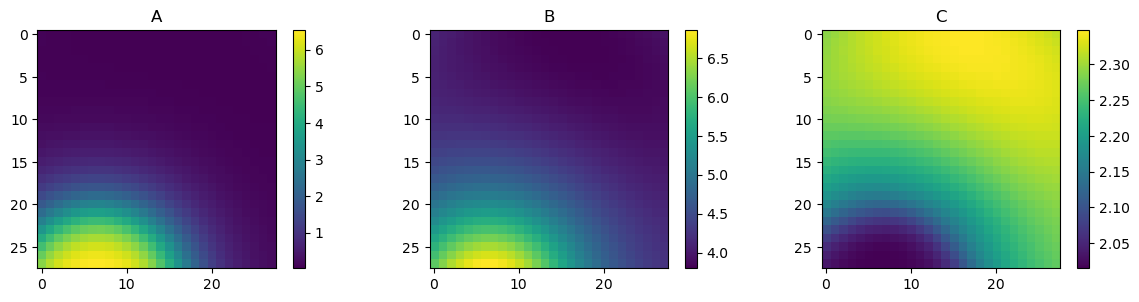

Epoch: 60000 
 data loss:0.005568, 
data A loss:0.002281, data B loss:0.001235, data C loss:0.002052, 
Laplacian A loss:0.006032, Laplacian B loss:0.008034
Physics loss:0.022875
Negative loss:0.000000

 b_A=-0.0048, b_B=0.9377, b_C=7.7873, V_A=3.6656, V_B=78.8516, V_C=14.9152, mu_A=0.0976, mu_B=0.4839, K_AA=4.8336, K_AB=9.3304, K_AC=23.7225, K_BA=5.4734, K_BC=12.3544, K_CB=9.0148, K_CC=3.0142


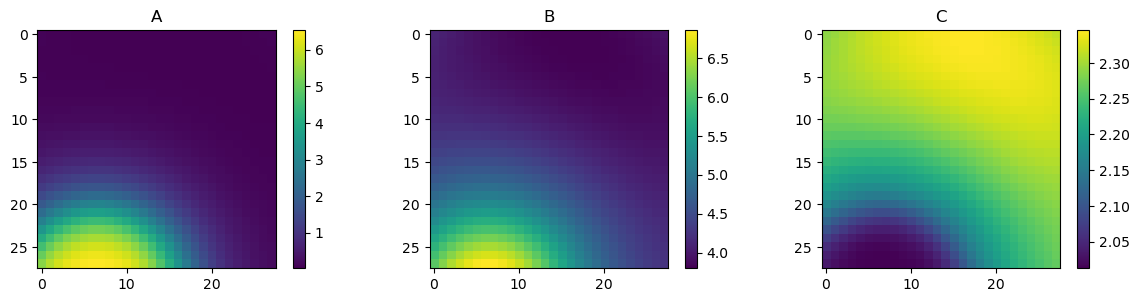

Epoch: 70000 
 data loss:0.004482, 
data A loss:0.002326, data B loss:0.001324, data C loss:0.000831, 
Laplacian A loss:0.005875, Laplacian B loss:0.007214
Physics loss:0.015190
Negative loss:0.000000

 b_A=-0.0016, b_B=0.9381, b_C=7.8344, V_A=3.6605, V_B=78.9472, V_C=15.1965, mu_A=0.0992, mu_B=0.4847, K_AA=4.8356, K_AB=9.3345, K_AC=24.5669, K_BA=5.4728, K_BC=12.0783, K_CB=9.0143, K_CC=3.0481


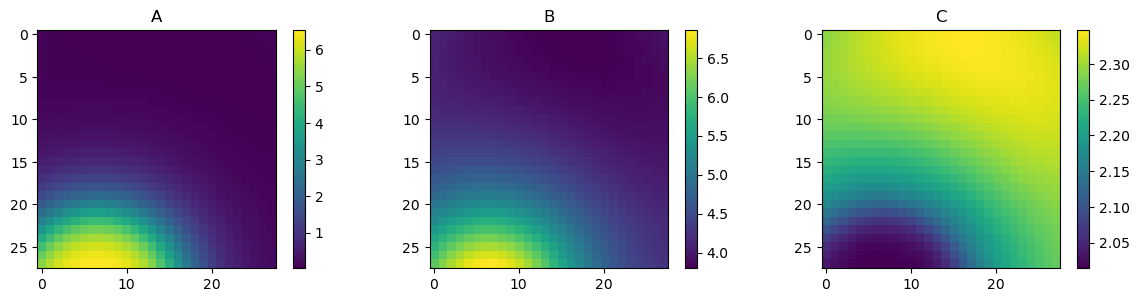

Epoch: 80000 
 data loss:0.003633, 
data A loss:0.002246, data B loss:0.000974, data C loss:0.000413, 
Laplacian A loss:0.005111, Laplacian B loss:0.006547
Physics loss:0.014348
Negative loss:0.000000

 b_A=-0.0069, b_B=0.9379, b_C=7.8818, V_A=3.6620, V_B=79.0097, V_C=15.4292, mu_A=0.0999, mu_B=0.4848, K_AA=4.8360, K_AB=9.3367, K_AC=25.2584, K_BA=5.4719, K_BC=11.7903, K_CB=9.0143, K_CC=3.0779


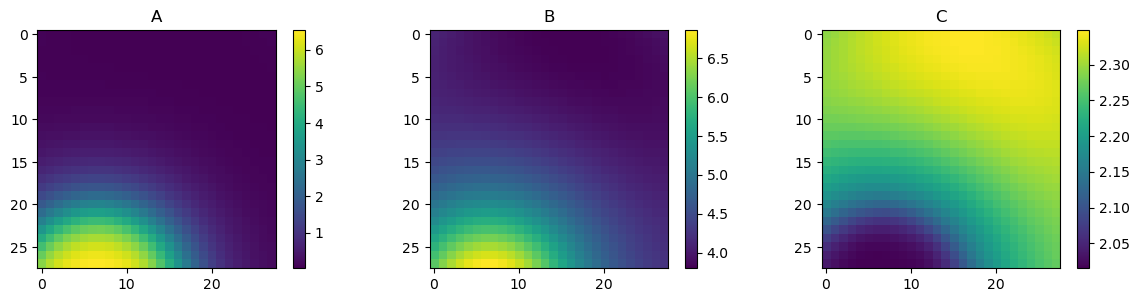

Epoch: 90000 
 data loss:0.004045, 
data A loss:0.002803, data B loss:0.000871, data C loss:0.000370, 
Laplacian A loss:0.007598, Laplacian B loss:0.005922
Physics loss:0.013023
Negative loss:0.000000

 b_A=-0.0022, b_B=0.9381, b_C=7.9096, V_A=3.6692, V_B=79.0183, V_C=15.6352, mu_A=0.0966, mu_B=0.4845, K_AA=4.8338, K_AB=9.3366, K_AC=25.9163, K_BA=5.4731, K_BC=11.6609, K_CB=9.0146, K_CC=3.0984


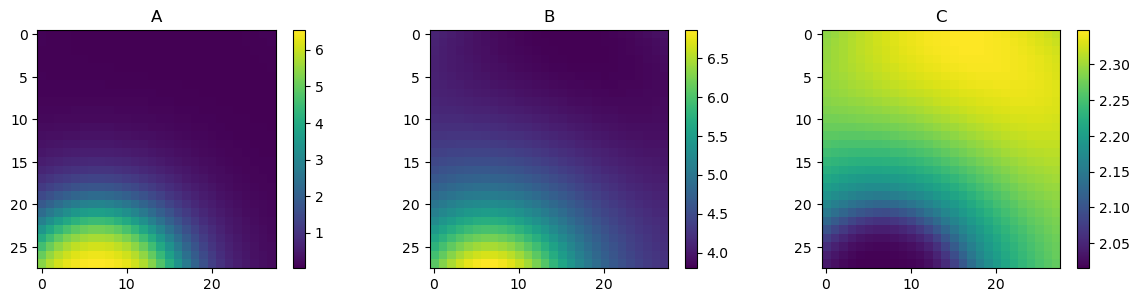

Epoch: 100000 
 data loss:0.009387, 
data A loss:0.004245, data B loss:0.004719, data C loss:0.000423, 
Laplacian A loss:0.022927, Laplacian B loss:0.006414
Physics loss:0.014651
Negative loss:0.000000

 b_A=-0.0031, b_B=0.9326, b_C=7.9371, V_A=3.6724, V_B=79.0057, V_C=15.8103, mu_A=0.0933, mu_B=0.4853, K_AA=4.8334, K_AB=9.3378, K_AC=26.2420, K_BA=5.4789, K_BC=11.5123, K_CB=9.0132, K_CC=3.1186


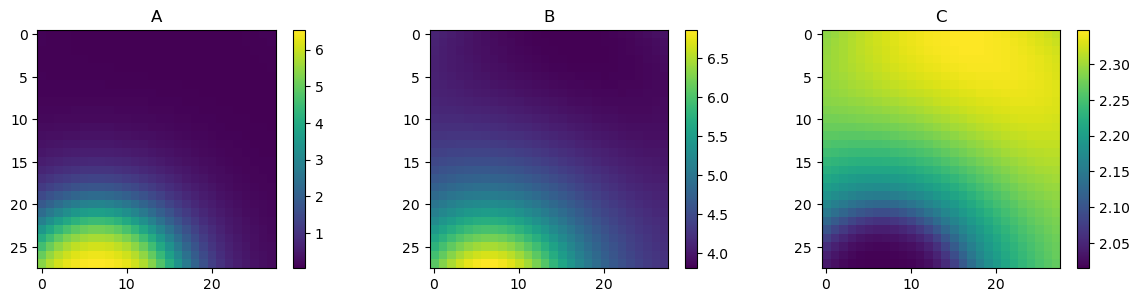

Epoch: 110000 
 data loss:0.005813, 
data A loss:0.003773, data B loss:0.001733, data C loss:0.000306, 
Laplacian A loss:0.023935, Laplacian B loss:0.005144
Physics loss:0.033894
Negative loss:0.000000

 b_A=-0.0013, b_B=0.9393, b_C=7.9547, V_A=3.6728, V_B=79.0040, V_C=15.9685, mu_A=0.0960, mu_B=0.4805, K_AA=4.8341, K_AB=9.3327, K_AC=26.2427, K_BA=5.4712, K_BC=11.4797, K_CB=9.0147, K_CC=3.1288


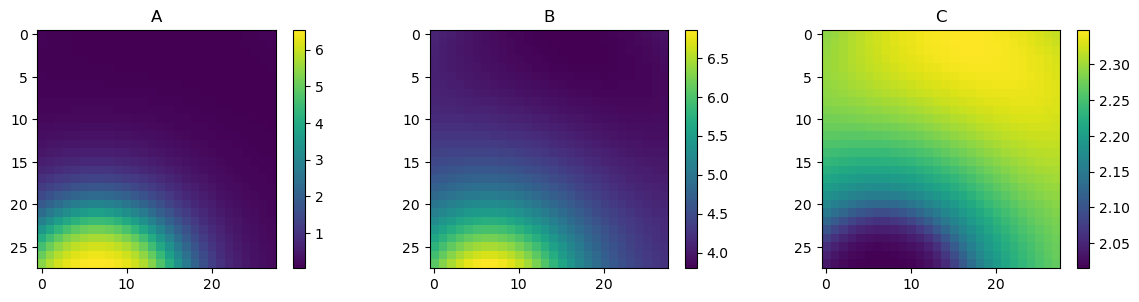

Epoch: 120000 
 data loss:0.012026, 
data A loss:0.003519, data B loss:0.007941, data C loss:0.000565, 
Laplacian A loss:0.034751, Laplacian B loss:0.008039
Physics loss:0.068313
Negative loss:0.000000

 b_A=-0.0053, b_B=0.9274, b_C=7.9635, V_A=3.6744, V_B=78.9881, V_C=16.0907, mu_A=0.1019, mu_B=0.4942, K_AA=4.8412, K_AB=9.3463, K_AC=26.2425, K_BA=5.4638, K_BC=11.4047, K_CB=9.0066, K_CC=3.1483


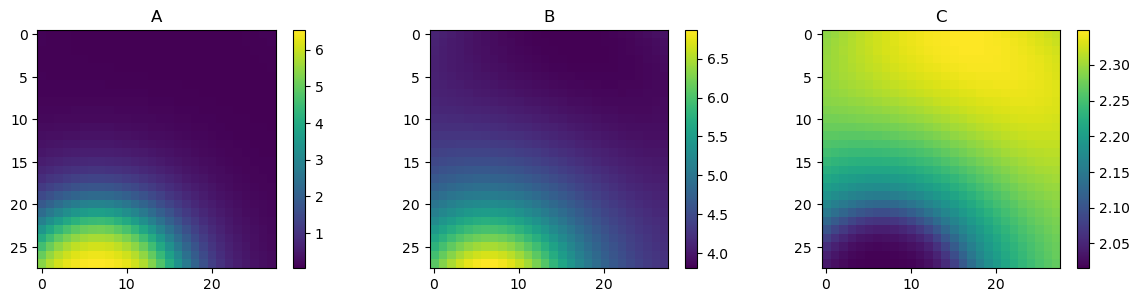

Epoch: 130000 
 data loss:0.008398, 
data A loss:0.002215, data B loss:0.005123, data C loss:0.001060, 
Laplacian A loss:0.004978, Laplacian B loss:0.006266
Physics loss:0.033748
Negative loss:0.000000

 b_A=-0.0158, b_B=0.9327, b_C=7.9962, V_A=3.6793, V_B=79.0024, V_C=16.2330, mu_A=0.1030, mu_B=0.4889, K_AA=4.8415, K_AB=9.3405, K_AC=26.2427, K_BA=5.4616, K_BC=11.2859, K_CB=9.0114, K_CC=3.1563


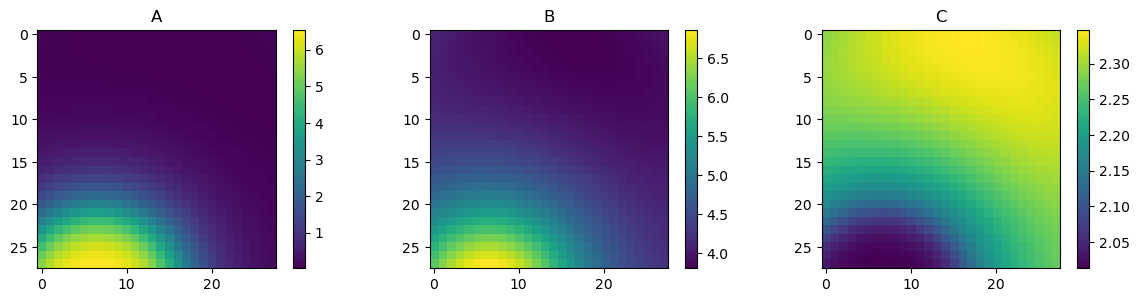

Epoch: 140000 
 data loss:0.003888, 
data A loss:0.002220, data B loss:0.001412, data C loss:0.000257, 
Laplacian A loss:0.005048, Laplacian B loss:0.004298
Physics loss:0.015167
Negative loss:0.000000

 b_A=-0.0052, b_B=0.9369, b_C=7.9993, V_A=3.6832, V_B=79.0232, V_C=16.3345, mu_A=0.1000, mu_B=0.4834, K_AA=4.8398, K_AB=9.3368, K_AC=26.2427, K_BA=5.4626, K_BC=11.2755, K_CB=9.0145, K_CC=3.1654


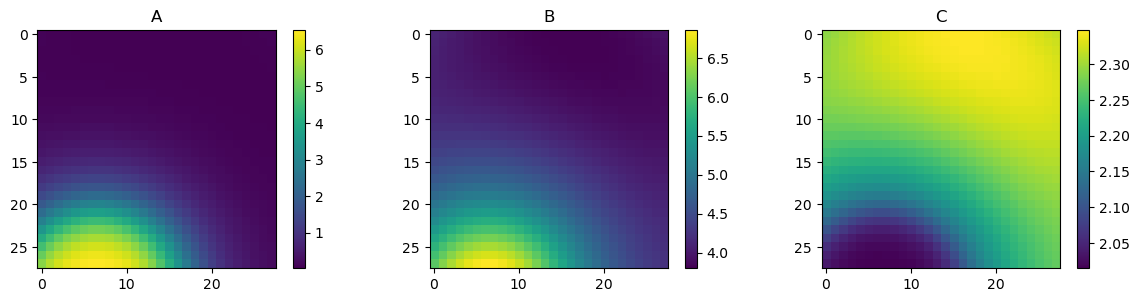

Epoch: 150000 
 data loss:0.007922, 
data A loss:0.006451, data B loss:0.001249, data C loss:0.000222, 
Laplacian A loss:0.046623, Laplacian B loss:0.004307
Physics loss:0.064030
Negative loss:0.000000

 b_A=-0.0193, b_B=0.9287, b_C=8.0138, V_A=3.6850, V_B=79.0213, V_C=16.4328, mu_A=0.1046, mu_B=0.4922, K_AA=4.8451, K_AB=9.3463, K_AC=26.2427, K_BA=5.4554, K_BC=11.1979, K_CB=9.0069, K_CC=3.1765


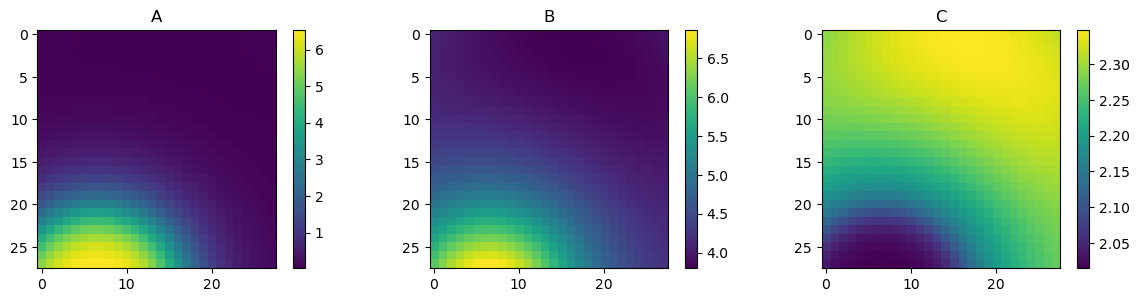

    Early dtoped at 150727
Epoch: 150727 
 data loss:0.003007, 
data A loss:0.002223, data B loss:0.000500, data C loss:0.000284, 
Laplacian A loss:0.004565, Laplacian B loss:0.003930
Physics loss:0.012411
Negative loss:0.000000

 b_A=-0.0037, b_B=0.9365, b_C=8.0163, V_A=3.6884, V_B=79.0315, V_C=16.4439, mu_A=0.0996, mu_B=0.4845, K_AA=4.8406, K_AB=9.3377, K_AC=26.2405, K_BA=5.4598, K_BC=11.1856, K_CB=9.0143, K_CC=3.1775


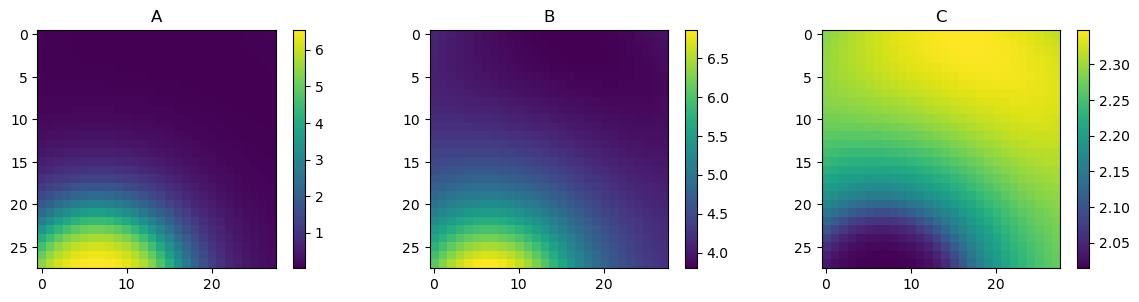

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 150000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - mu_B * B        
        F_C =  b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%10000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.0022124120668069653 B RMSE:0.0004982170079888466 C RMSE:0.00028524435606874673
F_A actual:0.011580254464645565, F_A:0.01154278963804245, RMSE: 0.00036768747975601086
F_B actual:6.160707376927223, F_B:6.1553425788879395, RMSE: 0.007145159775696077
F_C actual:9.204977661795959e-07, F_C:1.3394736697591725e-06, RMSE: 0.0010433110979224704

Laplacian A RMSE: 0.004725356942540072
Laplacian B RMSE: 0.003930896589421083

dAdt RMSE: 0.0003701007226201638
dBdt RMSE: 0.00811008501036381
dCdt RMSE: 0.0010433110979224704


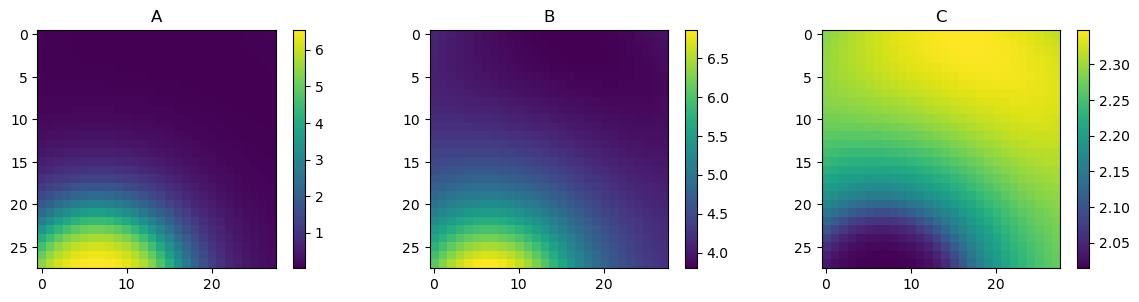

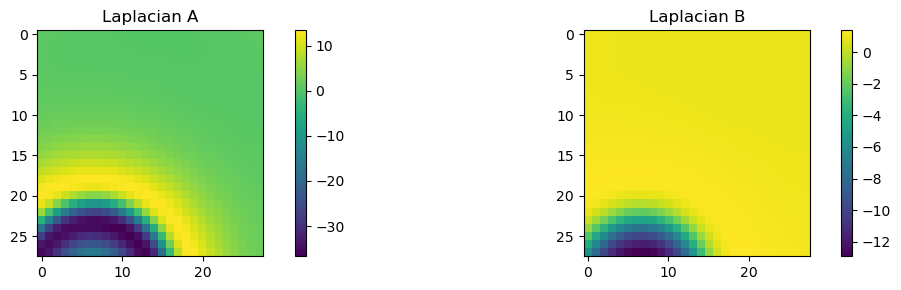

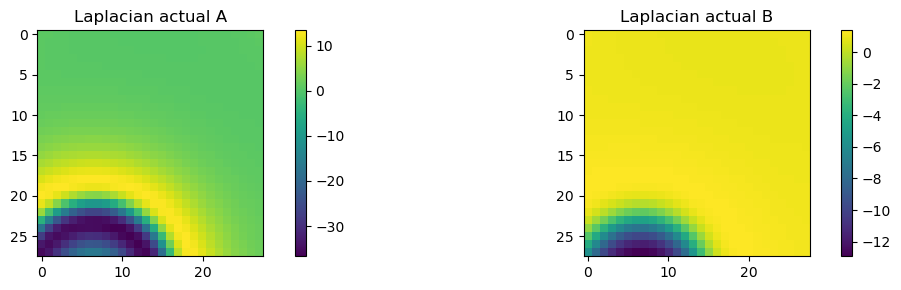

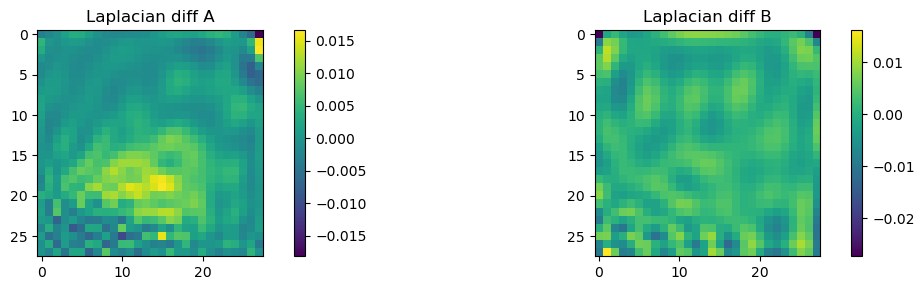

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

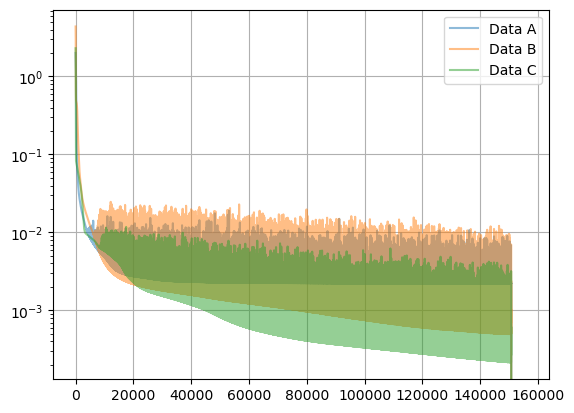

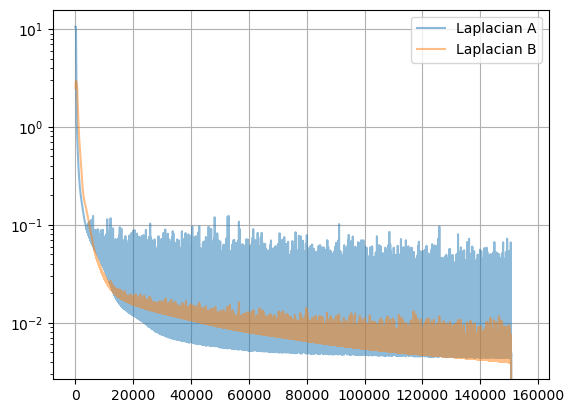

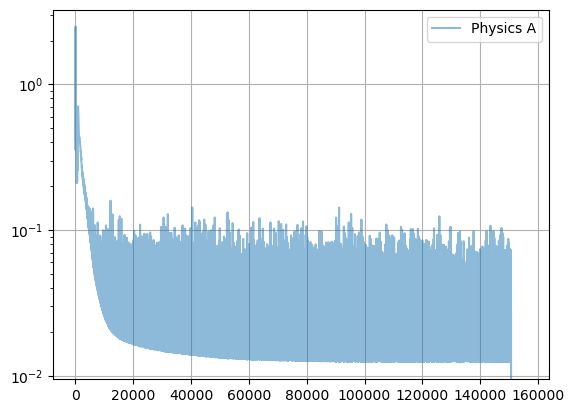

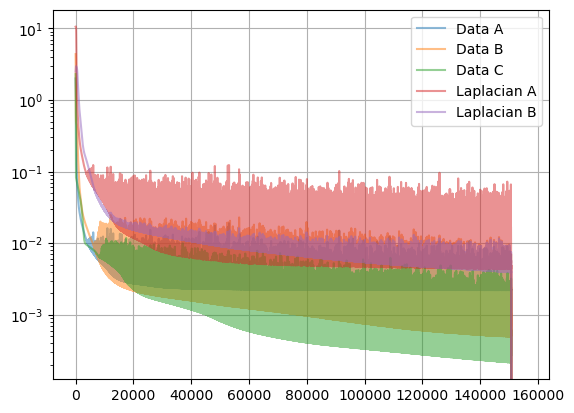

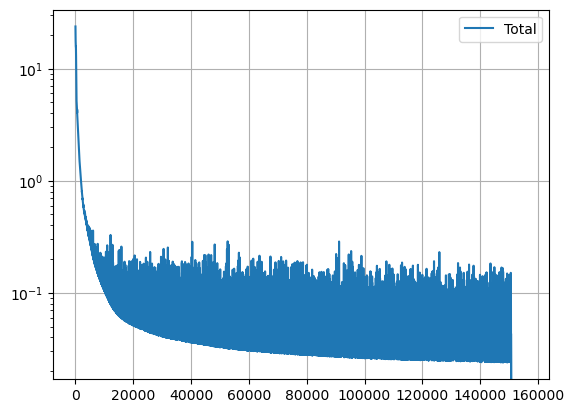

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

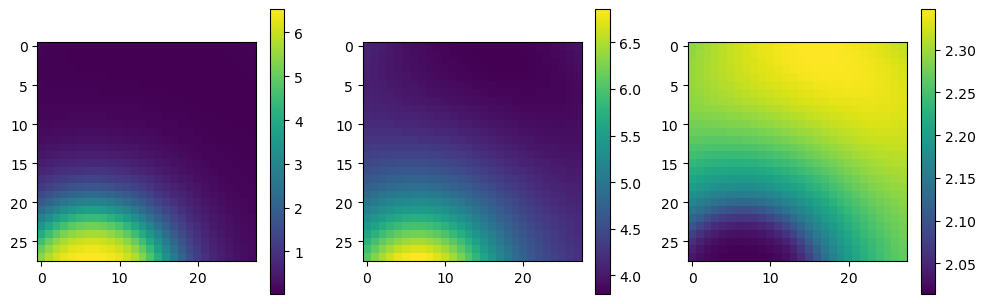

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.0022124120668069653
0.0004982170079888466
0.00028524435606874673


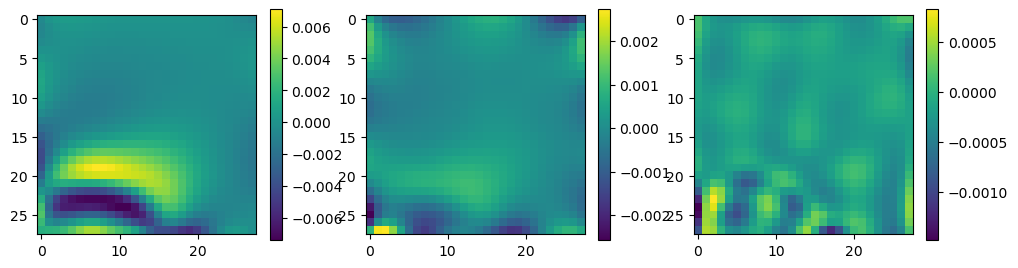

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [17]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	1.000		0.936		nan		(nan,nan)
b_C:	10.000		8.016		nan		(nan,nan)
V_A:	5.000		3.688		nan		(nan,nan)
V_B:	100.000		79.031		nan		(nan,nan)
V_C:	50.000		16.444		nan		(nan,nan)
mu_A:	0.100		0.100		nan		(nan,nan)
mu_B:	0.500		0.484		nan		(nan,nan)
K_AA:	5.000		4.841		0.004		(0.004,26.243)
K_AB:	10.000		9.338		0.004		(0.004,26.243)
K_AC:	5.000		26.241		26.243		(0.004,26.243)
K_BA:	5.000		5.460		0.951		(0.951,27.019)
K_BC:	5.000		11.186		0.951		(0.951,27.019)
K_CB:	10.000		9.014		9.014		(0.536,9.014)
K_CC:	5.000		3.177		0.536		(0.536,9.014)


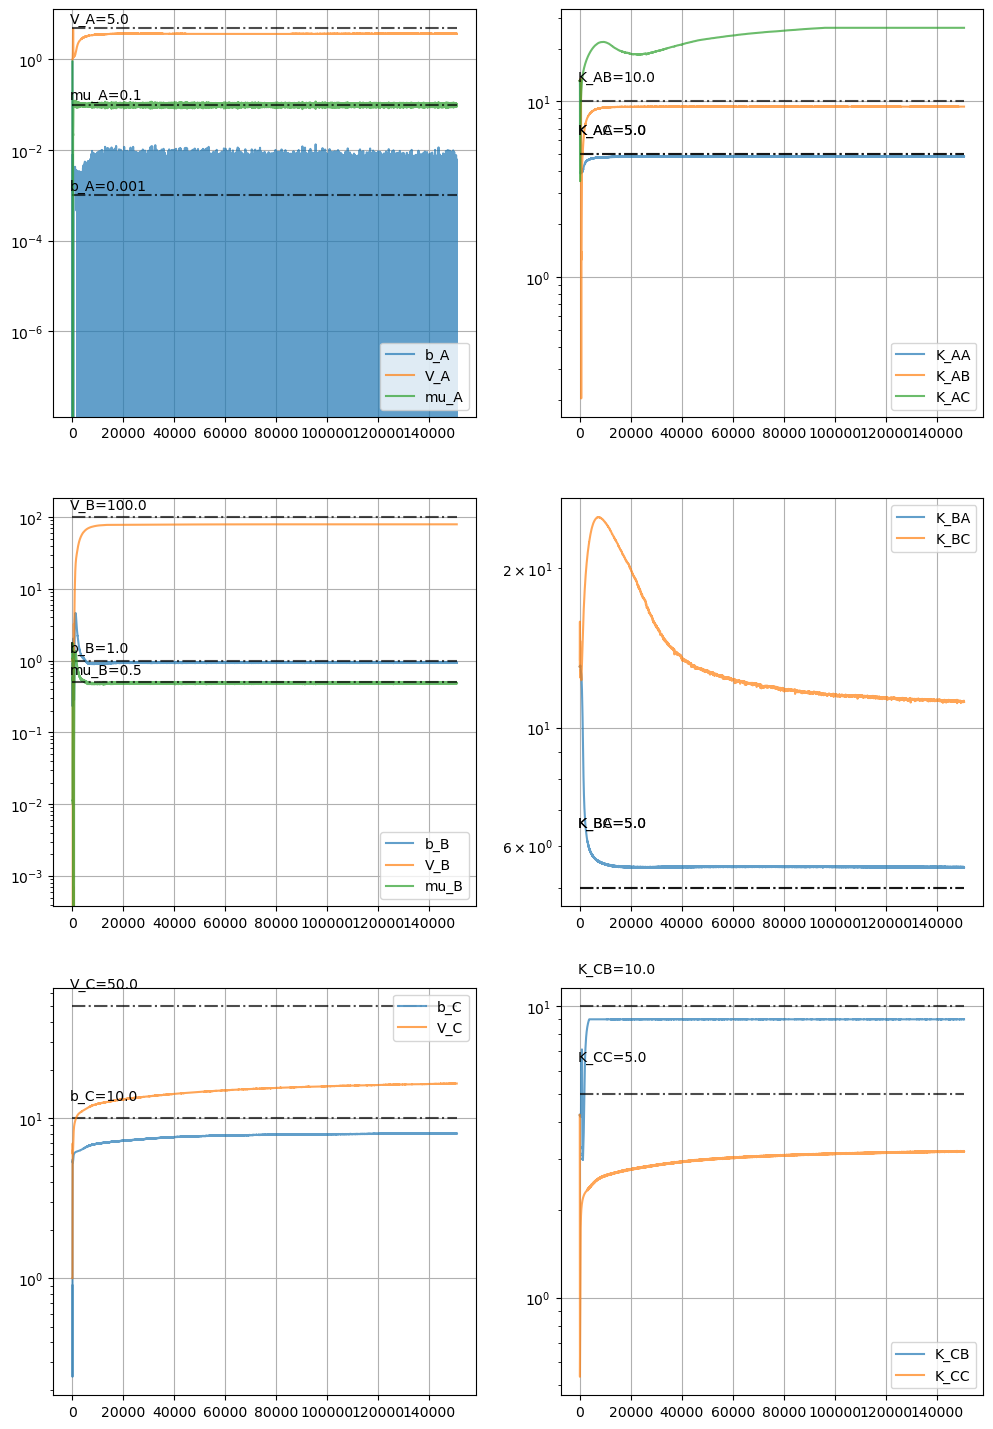

In [13]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [14]:
import pickle

torch.save(model, "./06_outputs/model_PINN_9")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_9")
with open('./06_outputs/model_PINN_params_name_list_9.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_9.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_9.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)    
with open(f"./06_outputs/model_PINN_estimated_params_list_9.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)    

In [15]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/5000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


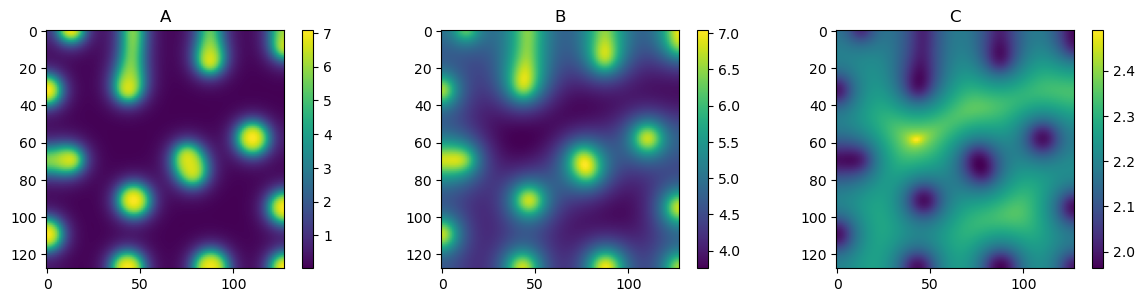

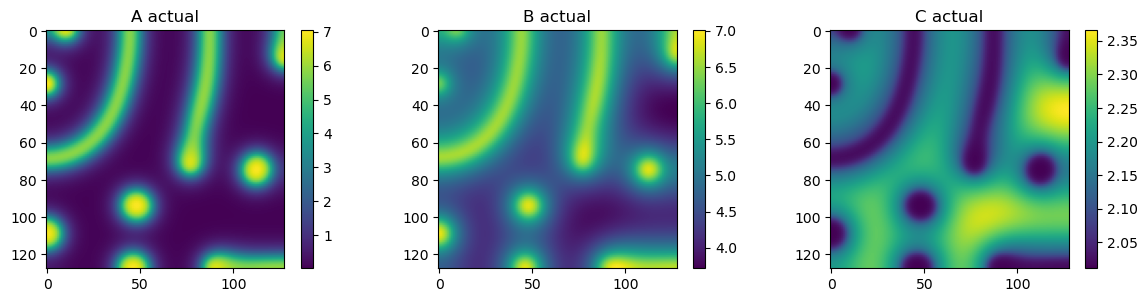

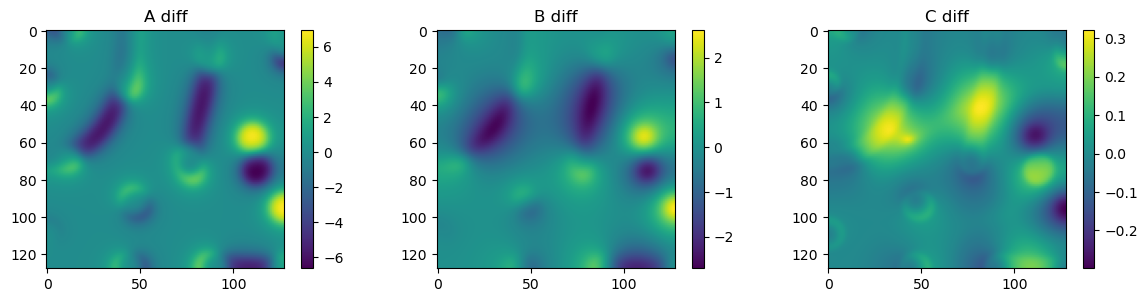

In [16]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_circuit_3954(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                                       params2["K_AA"], params2["K_AB"], params2["K_AC"],
                                       params2["b_B"], params2["mu_B"], params2["V_B"], 
                                       params2["K_BA"], params2["K_BC"],
                                       params2["b_C"], mu_C, params2["V_C"], 
                                       params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [16]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}

In [ ]:
A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [24]:
def save_image(data, filename):
    sizes = np.shape(data)     
    fig = plt.figure()
    fig.set_size_inches(1. * sizes[0] / sizes[1], 1, forward = False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(data)
    plt.savefig(filename, dpi = sizes[0]) 
    plt.close()

In [27]:
save_image(solution[105, 0, :, :], "Strip_A_actual.png")
save_image(solution[105, 1, :, :], "Strip_B_actual.png")
save_image(solution[105, 2, :, :], "Strip_C_actual.png")

save_image(A_test, "Strip_A_sol.png")
save_image(B_test, "Strip_B_sol.png")
save_image(C_test, "Strip_C_sol.png")